<a href="https://colab.research.google.com/github/rugkfl/co_pythons/blob/main/docs/quests/EDAs/EDA_LetalCarOfContractType.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

In [3]:
import pandas as pd
import seaborn as sns
df_LCCOT = pd.read_csv('LetalCarOfContractType.csv')
df_LCCOT[:10]

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
1,66755948,렌탈,Extension_Rental,서비스 방문,2019-10-20,60,카드이체,K1,102900,계약확정,0,없음,2.0,현대카드,정상,62.0,2532.0
2,66756657,렌탈,Normal,홈쇼핑/방송,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,8.0,우리은행,정상,60.0,2363.0
3,66423450,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,계약확정,0,없음,5.0,농협은행,정상,60.0,2449.0
4,66423204,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,해약확정,12,있음,8.0,농협은행,해약,51.0,1942.0
5,66165241,렌탈,Promotion,서비스 방문,2019-10-20,60,CMS,K3,90900,계약확정,0,없음,5.0,국민은행,정상,52.0,2001.0
6,66751017,렌탈,Package,홈쇼핑/방송,2019-10-20,60,카드이체,K1,98400,계약확정,0,없음,1.0,롯데카드,정상,59.0,2348.0
7,66751017,렌탈,Package,홈쇼핑/방송,2019-10-20,60,카드이체,K2,80400,계약확정,0,없음,1.0,롯데카드,정상,NaN,NaN
8,66758007,렌탈,Normal,서비스 방문,2019-10-20,60,카드이체,K3,102900,계약확정,0,없음,2.0,롯데카드,정상,61.0,2447.0
9,66756702,렌탈,Promotion,서비스 방문,2019-10-20,60,CMS,K1,105900,계약확정,0,없음,1.0,신한은행,정상,24.0,1172.0


## DDA

In [4]:
# 계약 유형 분포
df_LCCOT['type_of_contract'].value_counts()
# 대부분 고객은 렌탈 계약 유형을 선택
# 렌탈 계약에 대한 고객의 선호도가 높음을 반영, 멤버십 가입을 위한 마케팅 및 프로모션 전략 고려할 필요 있음

렌탈     46481
멤버십     4819
Name: type_of_contract, dtype: int64

In [5]:
# 계약 유형별로 필요 카테고리만 추출
## 렌탈 타입(단기)
df_lental = df_LCCOT[df_LCCOT['type_of_contract'] == '렌탈']
df_lental_columns = df_lental[['type_of_contract', 'Term', 'state', 'overdue_count', 'overdue', 'credit rating', 'cancellation', 'age', 'Mileage']]
df_lental_columns

,type_of_contract,Term,state,overdue_count,overdue,credit rating,cancellation,age,Mileage
0,렌탈,60,계약확정,0,없음,9.0,정상,43.0,1862.0
1,렌탈,60,계약확정,0,없음,2.0,정상,62.0,2532.0
2,렌탈,60,계약확정,0,없음,8.0,정상,60.0,2363.0
5,렌탈,60,계약확정,0,없음,5.0,정상,52.0,2001.0
6,렌탈,60,계약확정,0,없음,1.0,정상,59.0,2348.0
...,...,...,...,...,...,...,...,...,...
51296,렌탈,60,계약확정,0,없음,2.0,정상,44.0,1947.0
51297,렌탈,60,해약확정,0,없음,8.0,해약,70.0,2623.0
51300,렌탈,60,해약확정,0,없음,8.0,해약,39.0,1753.0
51301,렌탈,39,해약확정,0,없음,1.0,해약,51.0,2217.0


In [6]:
# 렌탈 계약에 대한 계약 상태 확인
df_lental_columns['state'].value_counts()
# 해약보다는 계약확정 비중이 훨씬 큼
# 인사이트 : 계약확정 비중이 높긴하지만 해약을 선택하는 요소를 파악하여 해약을 줄여나가기 위한 전략이 필요해보임

계약확정     46123
해약확정       344
해약진행중       14
Name: state, dtype: int64

In [7]:
# 렌탈 계약에 대한 연체 여부 확인
df_lental_columns['overdue'].value_counts()
# 연체 여부가 없는 고객층이 더 많은 것으로 파악

없음    44394
있음     2085
Name: overdue, dtype: int64

In [8]:
# 렌탈 계약에 대한 고객의 신용 등급 확인
df_lental_columns['credit rating'].value_counts()
# 가장 많은 등급이 1등급인 것으로 확인, 주로 높은 등급이 분포해 있음

1.0     10537
2.0      7772
4.0      5018
3.0      4544
5.0      4101
6.0      3615
7.0      2551
8.0      1463
9.0       636
0.0        60
10.0       45
Name: credit rating, dtype: int64

In [9]:
# 렌탈 계약에 대한 계약 취소 여부 확인
df_lental_columns['cancellation'].value_counts()

정상    46137
해약      344
Name: cancellation, dtype: int64

In [10]:
# 렌탈 계약에 대한 마일리지 평균값을 확인
round(df_lental_columns['Mileage'].mean(), 2)

1967.02

In [11]:
over_average = df_lental_columns.query('Mileage >= 1967.02')
over_average

,type_of_contract,Term,state,overdue_count,overdue,credit rating,cancellation,age,Mileage
1,렌탈,60,계약확정,0,없음,2.0,정상,62.0,2532.0
2,렌탈,60,계약확정,0,없음,8.0,정상,60.0,2363.0
5,렌탈,60,계약확정,0,없음,5.0,정상,52.0,2001.0
6,렌탈,60,계약확정,0,없음,1.0,정상,59.0,2348.0
8,렌탈,60,계약확정,0,없음,2.0,정상,61.0,2447.0
...,...,...,...,...,...,...,...,...,...
51286,렌탈,60,계약확정,0,없음,1.0,정상,51.0,2012.0
51290,렌탈,60,해약확정,0,없음,1.0,해약,48.0,2065.0
51297,렌탈,60,해약확정,0,없음,8.0,해약,70.0,2623.0
51301,렌탈,39,해약확정,0,없음,1.0,해약,51.0,2217.0


In [12]:
# 렌탈 계약 중 평균보다 높은 마일리지의 전체합계
over_average['Mileage'].sum()

43231237.0

In [13]:
# 계약 유형별로 필요 카테고리만 추출
## 멤버십 타입(장기)
df_membership = df_LCCOT[df_LCCOT['type_of_contract'] == '멤버십']
df_membership[['type_of_contract', 'Term', 'state', 'overdue_count', 'overdue', 'credit rating', 'cancellation', 'age', 'Mileage']]

,type_of_contract,Term,state,overdue_count,overdue,credit rating,cancellation,age,Mileage
3,멤버십,12,계약확정,0,없음,5.0,정상,60.0,2449.0
4,멤버십,12,해약확정,12,있음,8.0,해약,51.0,1942.0
15,멤버십,12,계약확정,0,없음,2.0,정상,33.0,1571.0
16,멤버십,12,계약확정,0,없음,2.0,정상,48.0,1957.0
18,멤버십,12,계약확정,0,없음,2.0,정상,41.0,1915.0
...,...,...,...,...,...,...,...,...,...
51278,멤버십,36,해약확정,0,없음,NaN,해약,NaN,NaN
51281,멤버십,36,해약확정,0,없음,NaN,해약,NaN,NaN
51287,멤버십,36,해약확정,0,없음,NaN,해약,NaN,NaN
51289,멤버십,36,해약확정,0,없음,NaN,해약,NaN,NaN


In [14]:
# 멤버십 계약에 대한 계약 상태 확인
df_membership['state'].value_counts()

계약확정    4223
해약확정     563
기간만료      33
Name: state, dtype: int64

In [15]:
# 멤버십 계약에 대한 연체 여부 확인
df_membership['overdue'].value_counts()

없음    4714
있음     105
Name: overdue, dtype: int64

In [16]:
# 멤버십 계약에 대한 신용 등급 확인
df_membership['credit rating'].value_counts()

2.0     454
3.0     453
4.0     361
1.0     240
5.0     216
6.0     203
7.0     166
8.0      79
9.0       3
10.0      1
Name: credit rating, dtype: int64

In [17]:
# 멤버십 계약에 대한 계약 취소 여부 확인
df_membership['cancellation'].value_counts()

정상    4231
해약     563
Name: cancellation, dtype: int64

In [18]:
# 멤버십 계약 중 평균 이상의 마일리지만 확인
over_average_second = df_membership.query('Mileage >= 1967.02')
over_average_second

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
3,66423450,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,계약확정,0,없음,5.0,농협은행,정상,60.0,2449.0
23,66422938,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,계약확정,0,없음,2.0,신한은행,정상,55.0,2280.0
127,66423812,멤버십,TAS,렌탈재계약,2019-10-21,12,CMS,K1,66900,계약확정,0,없음,2.0,국민은행,정상,60.0,2460.0
200,66423734,멤버십,TAS,렌탈재계약,2019-10-21,12,CMS,K1,66900,계약확정,0,없음,5.0,신한은행,정상,42.0,1978.0
240,66423757,멤버십,TAS,렌탈재계약,2019-10-21,12,CMS,K1,66900,계약확정,0,없음,4.0,하나은행,정상,65.0,2635.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50598,66144521,멤버십,TAS,R관리방판,2020-02-01,12,CMS,K1,66900,해약확정,0,없음,8.0,농협은행,해약,68.0,2876.0
50732,66820572,멤버십,TAS,R관리방판,2020-02-02,12,CMS,K1,66900,해약확정,0,없음,5.0,SC제일은행,해약,58.0,2267.0
50750,66131886,멤버십,TAS,렌탈재계약,2020-02-02,12,CMS,K1,66900,계약확정,0,없음,3.0,우리은행,정상,70.0,2611.0
50885,66178602,멤버십,TAS,R관리방판,2020-02-02,12,CMS,K1,66900,계약확정,0,없음,4.0,농협은행,정상,60.0,2488.0


In [19]:
# 멤버십 계약 중 평균보다 높은 마일리지의 전체합계
over_average_second['Mileage'].sum()

2384769.0

In [20]:
df_LCCOT.corr()

<ipython-input-20-20411f72a76d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_LCCOT.corr()


,id,Term,amount,overdue_count,credit rating,age,Mileage
id,1.000000,0.018640,-0.162013,-0.011126,0.010875,0.000030,-0.000965
Term,0.018640,1.000000,0.465662,-0.013498,-0.042443,-0.008474,-0.007871
amount,-0.162013,0.465662,1.000000,0.075492,-0.017583,-0.003537,-0.004146
overdue_count,-0.011126,-0.013498,0.075492,1.000000,0.202012,-0.001720,-0.002637
credit rating,0.010875,-0.042443,-0.017583,0.202012,1.000000,0.004609,0.002921
age,0.000030,-0.008474,-0.003537,-0.001720,0.004609,1.000000,0.973281
Mileage,-0.000965,-0.007871,-0.004146,-0.002637,0.002921,0.973281,1.000000


## EDA

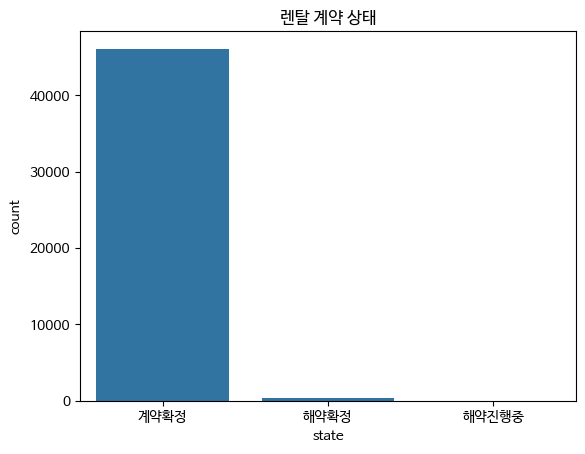

In [39]:
sns.countplot(data=df_lental_columns, x='state')
plt.title("렌탈 계약 상태")
plt.show()

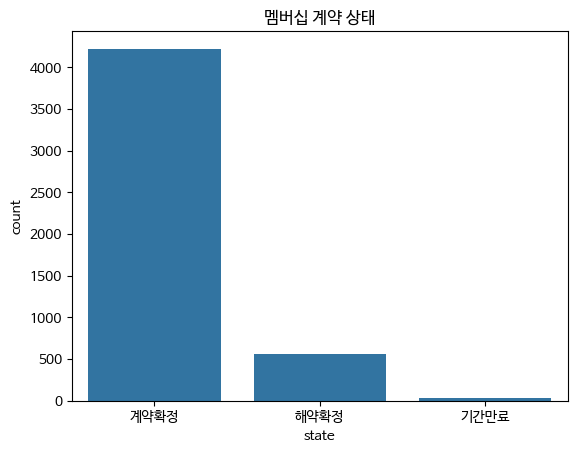

In [38]:
sns.countplot(data=df_membership, x='state')
plt.title("멤버십 계약 상태")
plt.show()

## 보고용 insight 작성
-제안 1: 고객 충성도 예측
 - 문제 정의: 고객의 계약 유형, 연체 기록, 신용 등급, 마일리지 등을 바탕으로 고객의 충성도(예: 장기 계약 유지 여부)를 예측합니다.
 - 배경: 충성도 높은 고객을 식별하여 타겟 마케팅 전략을 수립하고, 서비스 개선을 통해 고객 유지율을 높일 수 있습니다.
 -  전략제안 :
    + 계약 유형별 고객 분포 인사이트
      - 분석 결과 : 대부분 고객은 렌탈 계약 유형을 선택
      - 전략 제안 : '멤버십'계약에 대한 고객 유치를 위해 맞춤형 마케팅 활동 강화 필요

    + 렌탈 계약 상태에 따른 인사이트
      - 분석 결과 : '멤버십'계약에 대한 계약확정(4223)이 '렌탈'계약의 계약확정(46123)에 비해 적은 반면 해약에 대한 비중치가 '멤버십'해약(563)이 더 높은 것으로 확인('렌탈'계약의 해약비중 -> 344)/ '멤버십'계약의 해지율이 높은 이유를 파악하여 개선하고, 장기 고객을 위한 추가 혜탹 제공 전략 고려 필요
    
    + 연체 여부 확인
    

